In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [8]:
dataset = pandas.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [9]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [10]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [11]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


<h1> Estadísticos descriptivos </h1>
<h3> Calcular el rango de las variables</h3>

In [12]:
range_cols = [col for col in dataset.columns if 'pf_identity' in col]
range_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]
dataset[range_cols].max()- dataset[range_cols].min()


pf_identity_legal                 10.000000
pf_identity_parental_marriage     10.000000
pf_identity_parental_divorce      10.000000
pf_identity_parental              10.000000
pf_identity_sex_male              10.000000
pf_identity_sex_female            10.000000
pf_identity_sex                   10.000000
pf_identity_divorce               10.000000
pf_identity                       10.000000
ef_score                           6.310000
ef_rank                          161.000000
hf_score                           5.360486
hf_rank                          161.000000
dtype: float64

<h3> Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo 
y compararla con la de Latinoamérica y el caribe</h3>

La media y mediana de la variable identity son mas altas en Latino America & Caribe que en la Global. Podemos decir en funcion
de estos datos, que hay mayor libertad de identidad en Latam y Caribe comparado al Global. Esto lo posiciona mejor en el score.

La desviacion estandar es menor en Latino America y Caribe que en la Global. Podriamos decir que la influencia cultural/regional
hace que los datos esten menos dispersos

In [13]:
dataset[important_cols][['pf_identity','hf_score']].describe()

,pf_identity,hf_score
count,1378.000000,1378.000000
mean,7.334180,6.993444
std,3.159473,1.025811
min,0.000000,3.765827
25%,5.000000,6.336685
50%,9.166667,6.923840
75%,10.000000,7.894660
max,10.000000,9.126313


In [14]:
dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols] [['pf_identity','hf_score']].describe()

,pf_identity,hf_score
count,232.000000,232.000000
mean,8.765086,7.047982
std,1.711732,0.608904
min,5.000000,4.200724
25%,7.500000,6.779311
50%,10.000000,7.028045
75%,10.000000,7.339903
max,10.000000,8.290152


<h3>¿Tiene sentido calcular la moda? </h3> 
al ser variables continuas no tendría sentido calcular modas

<h3> Son todos los valores de pf_identity y hf_score directamente comparables? </h3>
Si son comparables, pero se ven influenciados por otras variables como el año y el pais

Text(0.5, 0, 'Identidad')

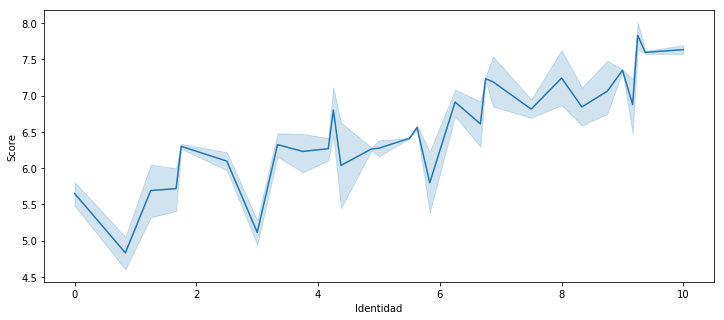

In [15]:
plt.figure(figsize=(12,5))
seaborn.lineplot(data=dataset[important_cols],x='pf_identity', y='hf_score')
plt.ylabel('Score')
plt.xlabel('Identidad')

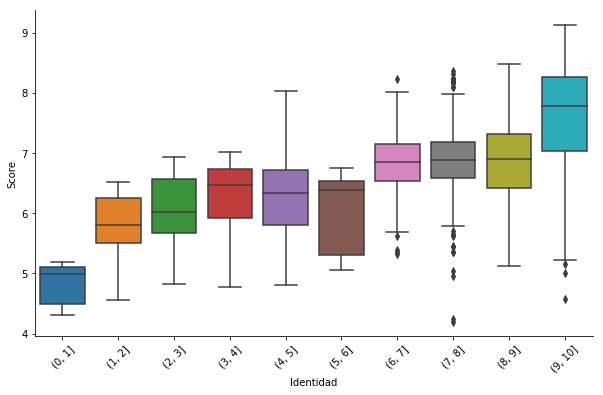

In [16]:
def to_categorical(column, bin_size=1, min_cut=0, max_cut=10):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset[important_cols][['pf_identity','hf_score']], x=(to_categorical(dataset['pf_identity'])), y='hf_score')
plt.ylabel('Score')
plt.xlabel('Identidad')
plt.xticks(rotation=45)
seaborn.despine()


<h3> Cómo pueden sanearse los valores faltantes? </h3> 
se podrían usar los países de la misma región, obtener la media y luego completar los valores faltantes

<h3> Encuentra outliers en estas dos variables? </h3>
No, solo en hf_score. Una forma de calcular los outliers es quitando sólo los que se encuentran en un rango de X desviaciones estándares de la media.

In [17]:
out_score = dataset['hf_score']
mask_score = numpy.abs(out_score-out_score.mean()) >= (2.5*out_score.std())
data = out_score[mask_score]
print('\033[1m','hf_score: ',data.count())
out_identity = dataset['pf_identity'].dropna()
mask_identity = numpy.abs(out_identity-out_identity.mean()) >= (2.5*out_identity.std())
data1 = out_identity[mask_identity]
print('pf_identity: ', data1.count(),'\033[0m')

 hf_score:  10
pf_identity:  0 


<h3>¿Los outliers, son globales o por grupo? </h3>
Son globales, pero estan concentrados en  Middle East & North Africa y en Latin America & the Caribbean

In [541]:
#data viene del punto anterior
valor= data.max()
dataset[dataset['hf_score'] < valor]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
69,2016,IRQ,Iraq,Middle East & North Africa,NaN,NaN,NaN,2.464387,6.058217,0.0,...,NaN,8.195023,6.502690,5.833445,6.475280,5.40,152.0,4.258014,159.0,4.0
141,2016,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,1.980355,9.118885,0.0,...,4.132620,NaN,6.233666,4.901109,5.444445,5.02,157.0,3.765827,162.0,4.0
157,2016,VEN,Venezuela,Latin America & the Caribbean,1.479799,3.271891,1.429083,2.060257,0.000000,10.0,...,1.522774,4.996742,1.122213,2.009841,2.483540,2.88,162.0,4.200724,161.0,4.0
159,2016,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,2.623957,7.336599,0.0,...,2.112554,NaN,7.220087,4.159381,5.227397,6.34,117.0,4.253278,160.0,4.0
303,2015,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,2.930968,9.118885,0.0,...,4.132620,NaN,6.233666,4.929028,5.392640,4.96,154.0,3.910826,159.0,4.0
319,2015,VEN,Venezuela,Latin America & the Caribbean,1.180740,2.920870,1.347288,1.816300,0.000000,10.0,...,1.559430,4.997285,1.122213,2.260861,2.564401,2.96,159.0,4.241750,157.0,4.0
321,2015,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,3.240893,7.336599,0.0,...,1.787548,7.916235,7.220087,4.701190,5.427578,6.07,125.0,4.203442,158.0,4.0
465,2014,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,3.075800,9.118885,0.0,...,4.579077,NaN,6.233666,5.064520,5.437804,4.97,153.0,4.023595,159.0,4.0
627,2013,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,3.584558,9.118885,0.0,...,0.000000,NaN,6.233666,3.177044,4.148599,4.07,156.0,4.095028,157.0,4.0


<h3>¿Los eliminaría del conjunto de datos? </h3>
Depende de cual sea el motivo de analisis...si se trata de concentrar esfuerzos para colaborar en culturas/regiones donde hay
menos libertades humanas, deberíamos enfocarnos en esos datos en lugar de eliminarlos.

<h3> Grafiquen la media de la variable pf_identity y hf_score a través de los años. </h3>

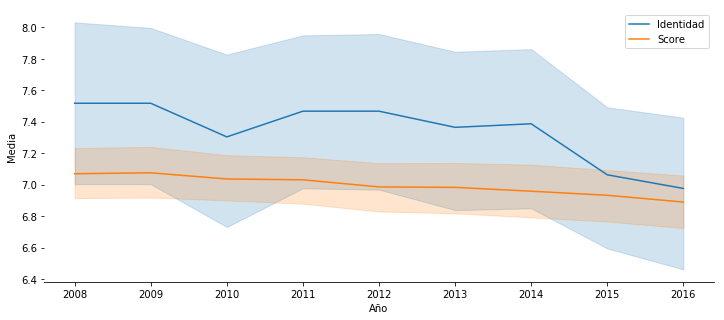

In [542]:
plt.figure(figsize=(12,5))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', label='Identidad') 
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='Score') 
plt.ylabel('Media')
plt.xlabel('Año')
seaborn.despine(left=True)

<h3> Realicen los mismos gráficos, pero separando por regiones. </h3>

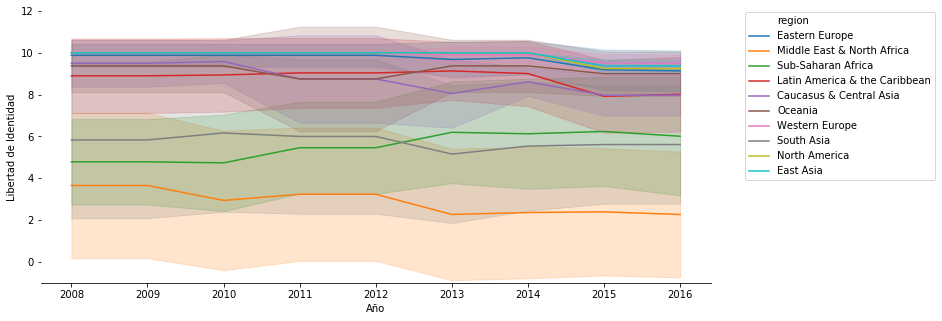

In [543]:
plt.figure(figsize=(12,5))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region', ci='sd')
plt.ylabel('Libertad de Identidad')
plt.xlabel('Año')
plt.ylim(-1, 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
seaborn.despine(left=True)

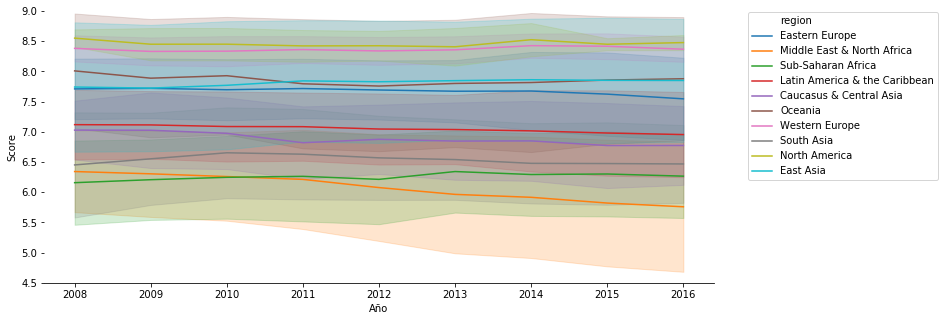

In [544]:
plt.figure(figsize=(12,5))
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region', ci='sd')
plt.ylabel('Score')
plt.xlabel('Año')
plt.ylim(4.5, 9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
seaborn.despine(left=True)

<h3> ¿La tendencia observada, es la misma que si no dividimos por regiones? </h3>
No, al separarlo por regiones pareciera que la media se mantiene estable, con algunas fluctuaciones para la identidad. En 
algunas regiones se notan caidas en los años 2013 y 2015. Posiblemente serian regiones para profundizar el analisis

<h4>Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable
pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia? </h4>
Visualmente, mirando el grafico que se genero

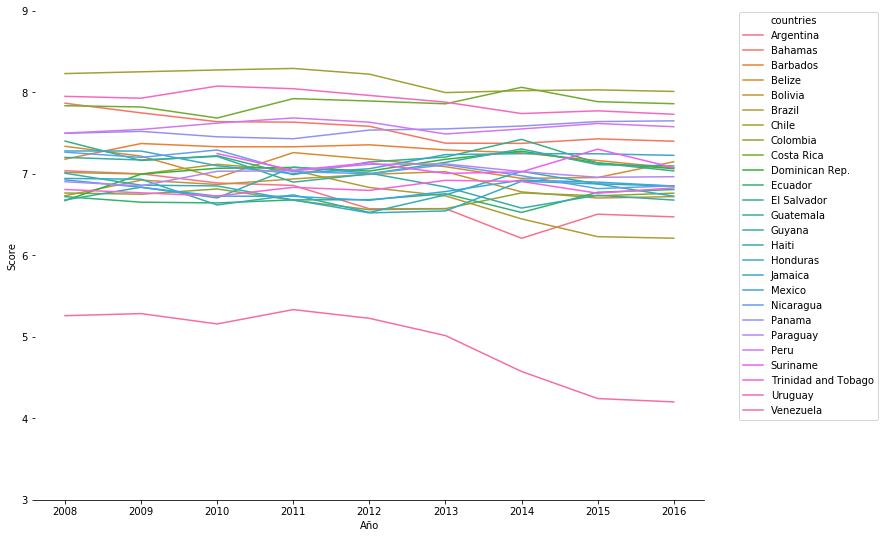

In [597]:
Latam = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols]
plt.figure(figsize=(12,9))
seaborn.lineplot(data=Latam, x='year', y='hf_score', hue='countries', ci='sd')
plt.ylabel('Score')
plt.xlabel('Año')
plt.ylim(3, 9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
seaborn.despine(left=True)

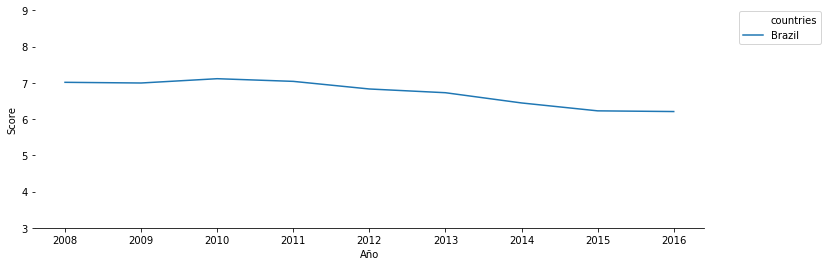

In [584]:
Latam = dataset[dataset['countries'] == 'Brazil'][important_cols]
plt.figure(figsize=(12,4))
seaborn.lineplot(data=Latam, x='year', y='hf_score', hue='countries', ci='sd')
plt.ylabel('Score')
plt.xlabel('Año')
plt.ylim(3, 9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
seaborn.despine(left=True)

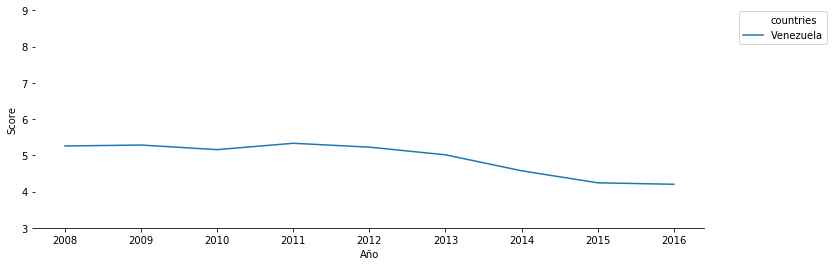

In [583]:
Latam = dataset[dataset['countries'] == 'Venezuela'][important_cols]
plt.figure(figsize=(12,4))
seaborn.lineplot(data=Latam, x='year', y='hf_score', hue='countries', ci='sd')
plt.ylabel('Score')
plt.xlabel('Año')
plt.ylim(3, 9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
seaborn.despine(left=True)

<h4> Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. 

¿Tienen alguna hipótesis para este comportamiento? </h4>
Pareciera que a medida que el score de libertad economica crece, el score de libertad humana baja...probablemente este 
influenciado por las regiones y paises, es un analisis interesante para profundizar

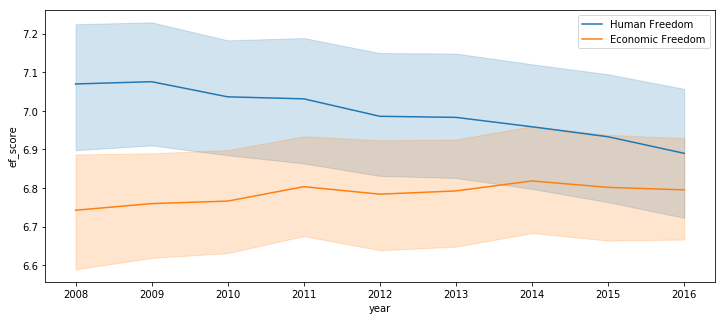

In [545]:
plt.figure(figsize=(12,5))
seaborn.lineplot(data=dataset, x='year', y='hf_score', label='Human Freedom') 
seaborn.lineplot(data=dataset, x='year', y='ef_score', label='Economic Freedom') 

<h1> 2. Distribuciones </h1>

<h3> Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe.</h3>
<h4>Visualmente, a qué tipo de distribución corresponde cada variable? </h4>
A una distribucion normal


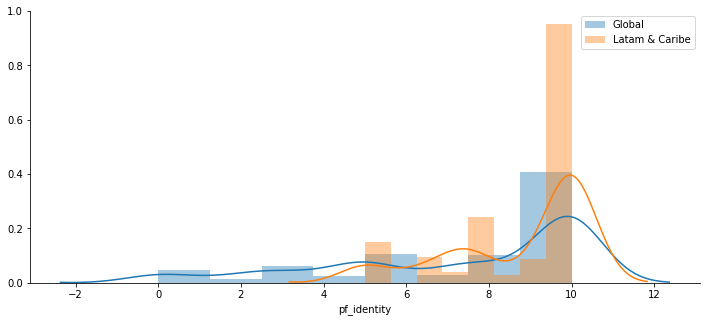

In [546]:
plt.figure(figsize=(12,5))
seaborn.distplot(dataset['pf_identity'].dropna(),bins=8,label='Global')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(),bins=8,label='Latam & Caribe')
plt.legend()
seaborn.despine()

<h3>Repetir para la variable hf_score.</h3>

C:\Users\papa\Anaconda3\envs\diplodatos\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\papa\Anaconda3\envs\diplodatos\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\papa\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\papa\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


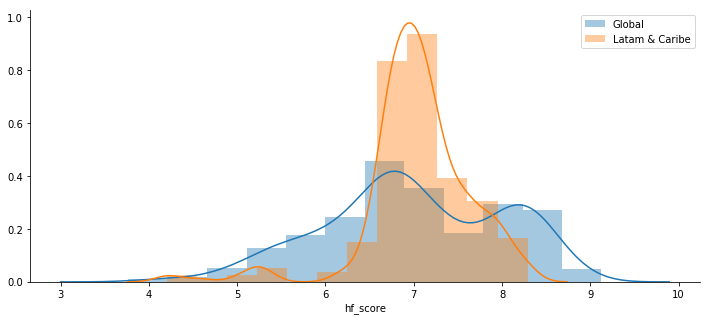

In [547]:
plt.figure(figsize=(12,5))
seaborn.distplot(dataset['hf_score'],bins=12, label='Global')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'],bins=12, label='Latam & Caribe')
plt.legend()
seaborn.despine()

<h3>¿Es correcto utilizar todos los registros para esas zonas en estos gráficos? </h3>
si, en este caso no nos afecta ya que no se encuentran outliers y ademas podemos inferir que para algun pais/año de la region Latam & Caribe falto completar informacion, podriamos concentrarnos en ver porque sucedio

<h3> Prueba de Kolmogorov-Smirnof </h3>
al dar el pvalue=0 no podemos decir que sea una distribucion normal

In [548]:
from scipy import stats
x = dataset['pf_identity'].dropna()
stats.kstest(x,'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [549]:
x = dataset['hf_score'].dropna()
stats.kstest(x,'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

<h3>Gráfico QQ de las mismas distribuciones</h3>
Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones 
sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

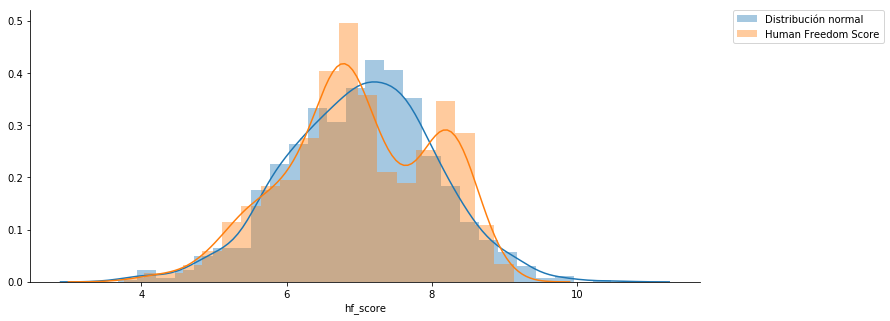

In [550]:
# Estimamos los parámetros muestrales
data=dataset['hf_score'].dropna()
loc, scale = stats.norm.fit(data)
loc, scale
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
plt.figure(figsize=(12,5))
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset['hf_score'].dropna(), label='Human Freedom Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [551]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['hf_score'].dropna())), percs)

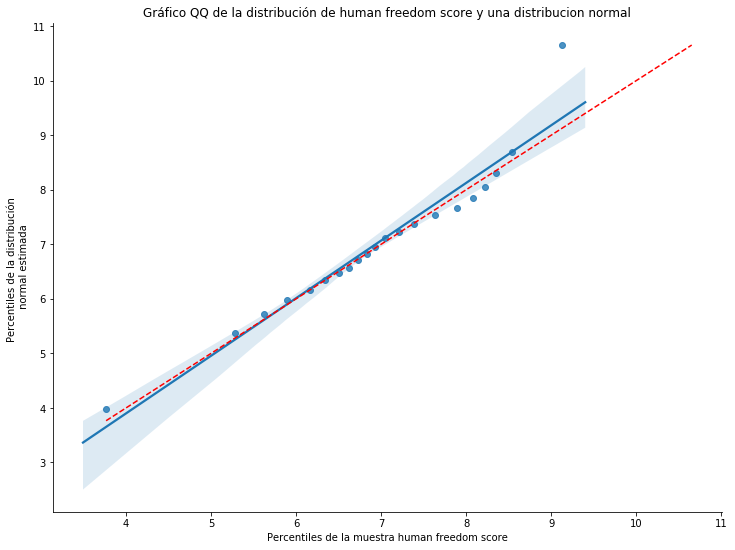

In [552]:
plt.figure(figsize=(12,9))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra human freedom score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de human freedom score y una distribucion normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")
seaborn.despine()

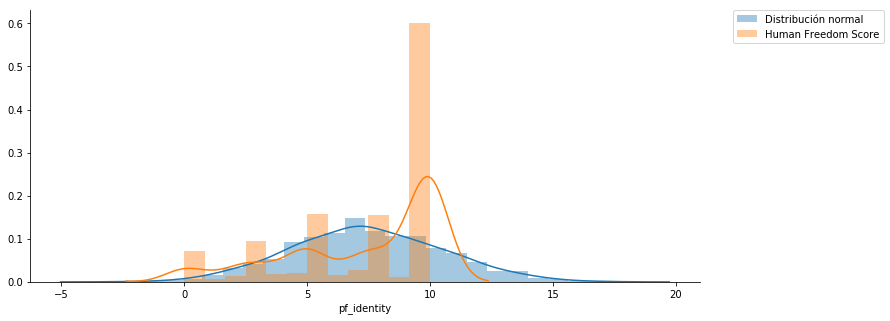

In [553]:
# Estimamos los parámetros muestrales
data = dataset['pf_identity'].dropna()
loc, scale = stats.norm.fit(data)
loc, scale
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
plt.figure(figsize=(12,5))
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset['pf_identity'].dropna(), label='Human Freedom Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [554]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['pf_identity'].dropna())), percs)

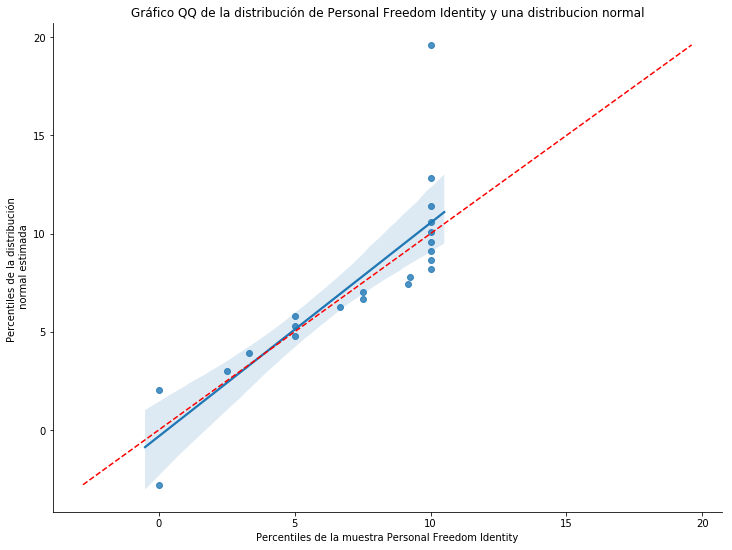

In [555]:
plt.figure(figsize=(12,9))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra Personal Freedom Identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Personal Freedom Identity y una distribucion normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")
seaborn.despine()

<h3> Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior </h3>

In [556]:
dataset[['hf_score','pf_identity']].skew()

hf_score      -0.212283
pf_identity   -0.913172
dtype: float64

In [557]:
dataset[['hf_score','pf_identity']].kurtosis()

hf_score      -0.507680
pf_identity   -0.411975
dtype: float64

Asimetría y Curtosis negativas: la cola de la distribución se alarga para valores inferiores a la media, sin embargo los 
graficos parecen indicar que hay simetria. Si bien el grafico provee mas informacion con los puntos, podria confundirnos 

<h1> Correlaciones </h1>

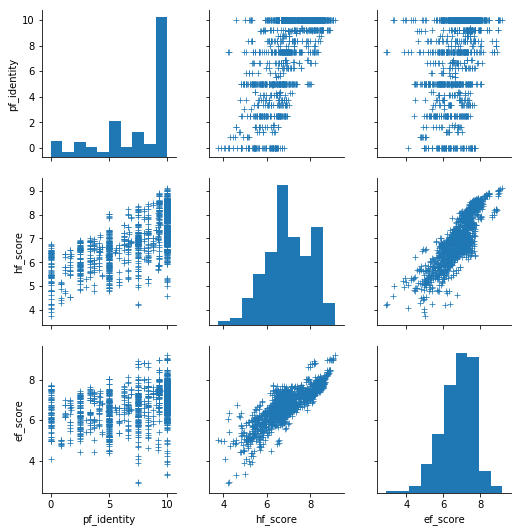

In [558]:
plot_data = dataset[important_cols][['pf_identity', 'hf_score', 'ef_score']]
seaborn.pairplot(data=plot_data, vars=['pf_identity', 'hf_score', 'ef_score'],markers='+')
seaborn.despine()

Parece haber una relacion lineal, puede notarse que a mayor libertad de identidad personal mayor es el score de libertad tanto humana como economica (conmayor incidencia en la humana)

Este tipo de grafico no seria el adecuado porque pf_identity es el resultado de un promedio, sólo toma algunos valores, es discreta

<Figure size 864x360 with 0 Axes>

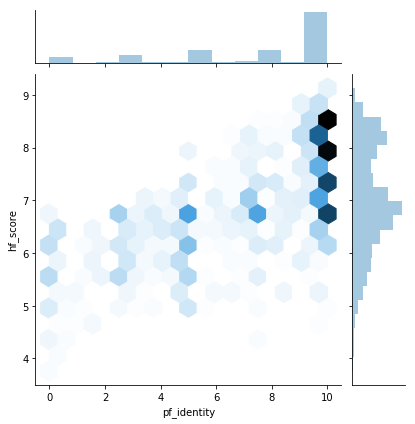

In [559]:
plt.figure(figsize=(12,5))
seaborn.jointplot(data=plot_data,
                  x='pf_identity', y='hf_score', kind='hex')
seaborn.despine()

<Figure size 360x360 with 0 Axes>

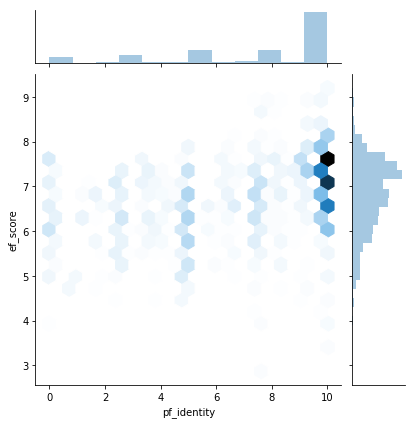

In [560]:
plt.figure(figsize=(5,5))
seaborn.jointplot(data=plot_data,
                  x='pf_identity', y='ef_score', kind='hex')
seaborn.despine()

Parece haber una concentracion de valores conjuntos, aunque no podemos asegurar que se sea sólo producto de los valores más frecuentes de cada distribución independiente

<h3>Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.</h3>

TAU de KENDALL no se va a usar ya que es una medida de asociación no paramétrica utilizada para estudiar variables CUALITATIVAS ordinales o de razón.
PEARSON tampoco se usara, ya que es un coeficiente paramétrico por lo que exige que la m.a. provenga de una distribución NORMAL y vimos con la prueba de kolmogorov realizada anteriormente que las distribuciones no son normales.

In [561]:
dataset[['pf_identity', 'hf_score']].corr(method ='spearman')

,pf_identity,hf_score
pf_identity,1.000000,0.686109
hf_score,0.686109,1.000000


En estos resultados, la correlación de Spearman entre pf_identity y hf_score es 0.686, lo que indica que existe una relación positiva entre las variables

In [562]:
dataset[['pf_identity', 'ef_score']].corr(method ='spearman')

,pf_identity,ef_score
pf_identity,1.000000,0.426993
ef_score,0.426993,1.000000


En estos resultados, la correlación de Spearman entre pf_identity y ef_score es 0.427, lo que indica que existe una relación positiva entre las variables

Estos resultados nos indican que hay correlacion entre las variables, ya que a medida que la libertad de identidad y la libertad humana aumentan, tambien lo hace la libertad economica, aunque en menor medida 